In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df_business = pd.read_csv('../../data/clean/clean_business_df.csv')
df_economy = pd.read_csv('../../data/clean/clean_economy_df.csv')

In [3]:
# Dropping columns that seem too hard to use or redudant (time_group easier to use than time)
columns_to_drop = ['flight_date', 'flight_code', 'departure_time', 'arrival_time']
ml_business = df_business.drop(columns=columns_to_drop)

In [4]:
# Dropping columns that seem too hard to use or redudant (time_group easier to use than time)
columns_to_drop = ['flight_date', 'flight_code', 'departure_time', 'arrival_time']
ml_economy = df_economy.drop(columns=columns_to_drop)

<Axes: ylabel='Density'>

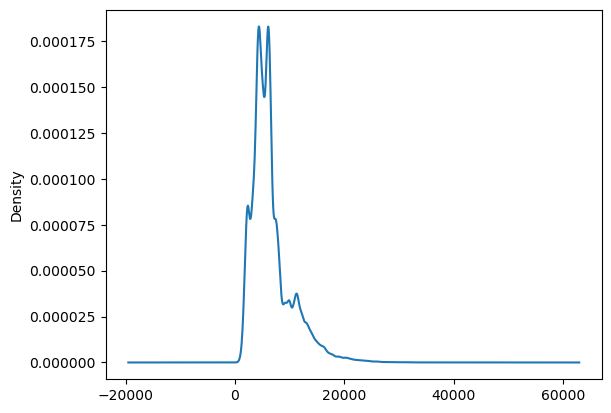

In [5]:
# Looking at price distribution for economy class flights (!!! Price in indian rupees)
df_economy['price'].plot(kind='kde')

<Axes: ylabel='Density'>

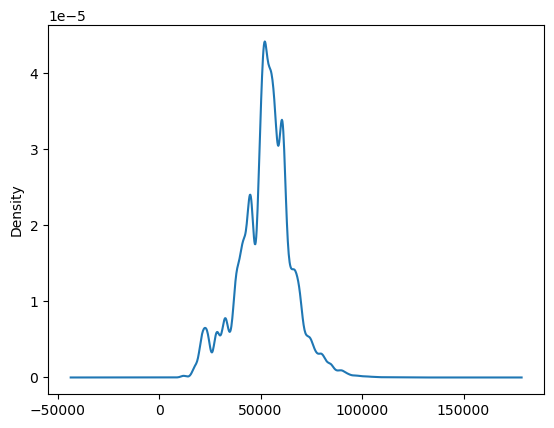

In [6]:
# Looking at price distribution for business class flights (!!! Price in indian rupees)
df_business['price'].plot(kind='kde')

In [7]:
# Choosing which columns are categorical variables
categorical_columns = ['airline_name', 'departure_city', 'arrival_city']

# Apply one-hot encoding
business_df = pd.get_dummies(ml_business, columns=categorical_columns)
economy_df = pd.get_dummies(ml_economy, columns=categorical_columns)

In [8]:
# Label encode the categorical columns (assuming they are ordinal)
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical ordinal features
business_df['departure_time_group'] = label_encoder.fit_transform(business_df['departure_time_group'])
economy_df['departure_time_group'] = label_encoder.fit_transform(economy_df['departure_time_group'])

business_df['arrival_time_group'] = label_encoder.fit_transform(business_df['arrival_time_group'])
economy_df['arrival_time_group'] = label_encoder.fit_transform(economy_df['arrival_time_group'])

In [9]:
# Define target and features
X_business = business_df.drop('price', axis=1)
y_business = business_df['price']

X_economy = economy_df.drop('price', axis=1)
y_economy = economy_df['price']

# Split the data into training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_business, y_business, test_size=0.2, random_state=42)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_economy, y_economy, test_size=0.2, random_state=42)

In [10]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the RandomForestRegressor for business data
rf_business = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model on the business data
rf_business.fit(X_train_b, y_train_b)

# Make predictions on the business test data
y_pred_b = rf_business.predict(X_test_b)

# Evaluate the model for the business data
mse_b = mean_squared_error(y_test_b, y_pred_b)
r2_b = r2_score(y_test_b, y_pred_b)

print(f'Business Data - Mean Squared Error: {mse_b}')
print(f'Business Data - R-squared: {r2_b}')

Business Data - Mean Squared Error: 21093634.145508673
Business Data - R-squared: 0.8752693649801178


In [11]:
from sklearn.model_selection import GridSearchCV

# Set up hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],  # Reduce the number of trees
    'max_depth': [None, 10],  # Limit the depth range
    'min_samples_split': [2, 5],  # Reduce the number of splits
    'min_samples_leaf': [1, 2],  # Reduce the leaf options
    'bootstrap': [True]  # Test only one option for bootstrap
}

# Initialize RandomForestRegressor
rf_economy = RandomForestRegressor(random_state=42)

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=rf_economy, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search model
grid_search.fit(X_train_e, y_train_e)

# Print the best parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Train the best model from GridSearchCV
best_rf_economy = grid_search.best_estimator_

# Predict with the best model
y_pred_e = best_rf_economy.predict(X_test_e)

# Evaluate the model performance
mse_e = mean_squared_error(y_test_e, y_pred_e)
r2_e = r2_score(y_test_e, y_pred_e)

print(f'Economy Data (Tuned) - Mean Squared Error: {mse_e}')
print(f'Economy Data (Tuned) - R-squared: {r2_e}')


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.9min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.0min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 3.2min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 5.6min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.7min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 5.9min
[CV] END bootstrap=True, max_depth=None, min_sam

In [12]:
# # Initialize the RandomForestRegressor for economy data
# rf_economy = RandomForestRegressor(n_estimators=100, random_state=42)

# # Train the Random Forest model on the economy data
# rf_economy.fit(X_train_e, y_train_e)

# # Make predictions on the economy test data
# y_pred_e = rf_economy.predict(X_test_e)

# # Evaluate the model for the economy data
# mse_e = mean_squared_error(y_test_e, y_pred_e)
# r2_e = r2_score(y_test_e, y_pred_e)

# print(f'Economy Data - Mean Squared Error: {mse_e}')
# print(f'Economy Data - R-squared: {r2_e}')